In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import KBinsDiscretizer

from sklearn import model_selection

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")


In [4]:
listings = pd.read_csv("D:\Trent Notes\Data Minining\Assignments\Assignment 2\seattle\listings.csv")
print(listings.head(3)) 

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   

                                         description exp

In [5]:
print(listings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [6]:
print(listings.describe())


                 id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3816.000000  3818.000000  3818.000000   3818.000000   
mean                    7.157757    47.628961  -122.333103      3.349398   
std                    28.628149     0.043052     0.031745      1.977599   
min                     1.000000    47.505088  

In [7]:
# To keep the graph of everything uniform
plt.rcParams['figure.figsize']= (20,7)

# Performing few data manipulation to ensure data is fit for modelling

In [8]:
listings.price = listings.price.str.strip("$").str.replace(",", "")
listings.monthly_price = listings.monthly_price.str.strip("$").str.replace(",", "")
listings.weekly_price = listings.weekly_price.str.strip("$").str.replace(",", "")
print("price")
print(listings.price.head(3))
print("monthly_price")
print(listings.monthly_price.head(3))
print("weekly_price")
print(listings.weekly_price.head(5))

price
0     85.00
1    150.00
2    975.00
Name: price, dtype: object
monthly_price
0        NaN
1    3000.00
2        NaN
Name: monthly_price, dtype: object
weekly_price
0        NaN
1    1000.00
2        NaN
3     650.00
4        NaN
Name: weekly_price, dtype: object


In [7]:
columns = ['price','bathrooms','bedrooms','beds','last_review']
null_columns =listings[columns]

In [10]:

# mean is calculated for price and then replacd the mean in place of nulls
listings.price = listings.price.astype(np.float64)
price_mean = listings.price.mean()
print(price_mean)
listings["price"]=listings["price"].fillna(listings["price"].mean())

#Mode is calculated for last review  and then replacd with the mode in place of nulls
last_review_mode = listings.last_review.mode()[0]
print(last_review_mode)
listings["last_review"]=listings["last_review"].fillna(listings["last_review"].mode()[0])


#mode is calculated for bathrooms and all the nulls are replaced by nulls 
bathrooms_mode = listings.bathrooms.mode()
print(bathrooms_mode)
listings["bathrooms"]=listings["bathrooms"].fillna(listings["bathrooms"].mode()[0])


#mode is calculated for bedrooms and all the nulls are replaced by nulls 
bedrooms_mode = listings.bedrooms.mode()
print(bedrooms_mode)
listings["bedrooms"]=listings["bedrooms"].fillna(listings["bedrooms"].mode()[0])


#mode is calculated for bedrooms and all the nulls are replaced by nulls 
beds_mode = listings.beds.mode()
print(beds_mode)
listings['beds'] =listings['beds'].fillna(listings['beds'].mode()[0])




127.97616553169199
2016-01-02
0    1.0
dtype: float64
0    1.0
dtype: float64
0    1.0
dtype: float64


# Converting all the necessary columns to appropriate data types

In [11]:
listings.monthly_price = listings.monthly_price.astype(np.float64)

listings.weekly_price = listings.weekly_price.astype(np.float64)

listings.bedrooms = listings.bedrooms.astype(int)

listings.beds = listings.beds.astype(int)

listings.accommodates = listings.accommodates.astype(int)




In [12]:
Room =listings[['room_type','review_scores_cleanliness','review_scores_communication']]
print(Room)


            room_type  review_scores_cleanliness  review_scores_communication
0     Entire home/apt                       10.0                         10.0
1     Entire home/apt                       10.0                         10.0
2     Entire home/apt                       10.0                         10.0
3     Entire home/apt                        NaN                          NaN
4     Entire home/apt                        9.0                         10.0
...               ...                        ...                          ...
3813  Entire home/apt                       10.0                          8.0
3814  Entire home/apt                       10.0                         10.0
3815  Entire home/apt                        NaN                          NaN
3816  Entire home/apt                        NaN                          NaN
3817  Entire home/apt                        NaN                          NaN

[3818 rows x 3 columns]


In [13]:
#grouping the dataset by room to perform analysis
room =Room.groupby('room_type').mean()
room

#removing the index of the column
room = room.reset_index()
room

,room_type,review_scores_cleanliness,review_scores_communication
0,Entire home/apt,9.587376,9.808380
1,Private room,9.542105,9.822292
2,Shared room,8.989130,9.706522


In [13]:
room.review_scores_communication

0    9.808380
1    9.822292
2    9.706522
Name: review_scores_communication, dtype: float64

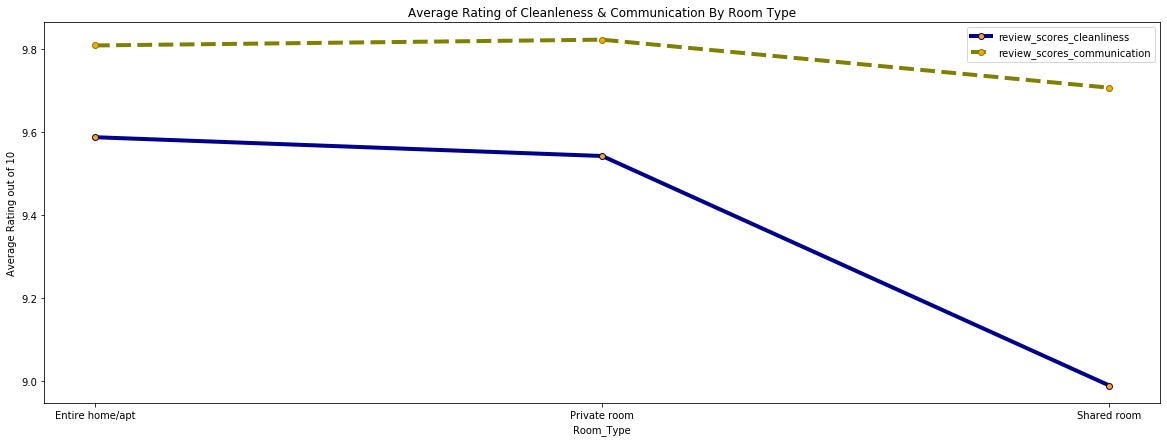

In [14]:
plt.plot( 'room_type', 'review_scores_cleanliness', data=room, marker='o', markerfacecolor='orange', color='darkblue', linewidth=4)
plt.plot( 'room_type', 'review_scores_communication', data=room, marker='o',  markerfacecolor='orange',color='olive', linestyle='dashed',linewidth=4)
plt.legend()
plt.xlabel("Room_Type")
plt.ylabel("Average Rating out of 10")
plt.title("Average Rating of Cleanleness & Communication By Room Type")
plt.show()

We can see from the graph that the shared room has overall  Cleanleness & Communication rating less

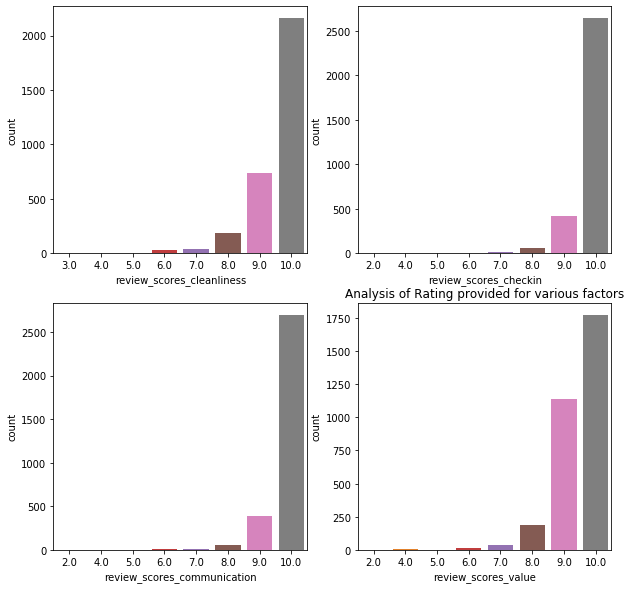

In [15]:
fig,axes= plt.subplots(nrows=2, ncols= 2,figsize=(10,10))
# graph to analyse the count of feedbacks recieved for teh below mentioned categories rated among the scale of 1 to 10
sb.countplot(listings['review_scores_cleanliness'],ax=axes[0][0])
sb.countplot(listings['review_scores_checkin'],ax=axes[0][1])
sb.countplot(listings['review_scores_communication'],ax=axes[1][0])
#sb.countplot(listings['review_scores_location'],ax=axes[1][1])
sb.countplot(listings['review_scores_value'],ax=axes[1][1])
plt.title("Analysis of Rating provided for various factors")
plt.show()

This above graphs is used to anlyse the total no of records that are having very less ratings

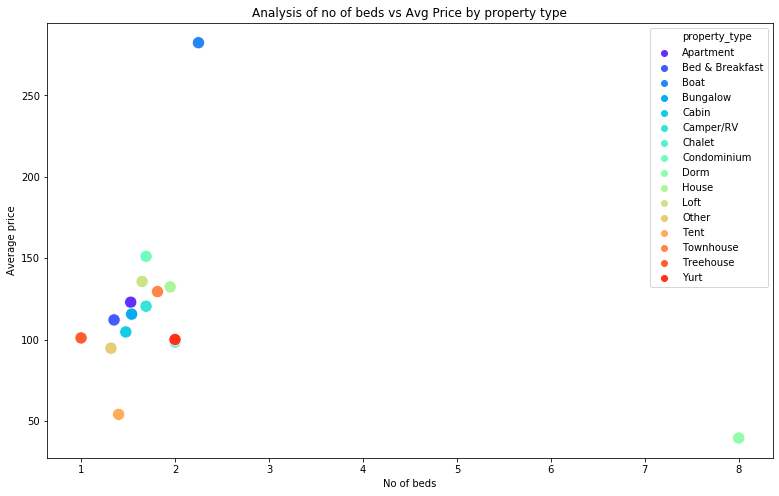

In [16]:
property= listings[['beds', 'price', 'property_type']]
price= property.groupby('property_type', as_index= False).agg({'beds':'mean','price':'mean'})

plt.figure(figsize=(13,8))
sb.scatterplot(x='beds',y='price',hue='property_type',data= price,s =150 ,palette="rainbow")
plt.title("Analysis of no of beds vs Avg Price by property type")
plt.xlabel("No of beds")
plt.ylabel("Average price")
plt.show()

The above graph is used to Analysis of no of beds vs Avg Price by property type

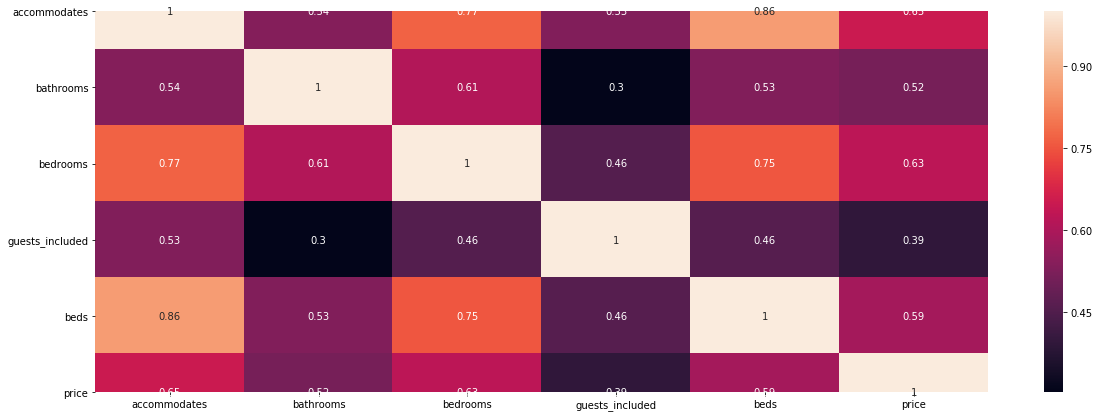

In [17]:
columns = ['accommodates','bathrooms','bedrooms','guests_included','beds','price']
sb.heatmap(listings[columns].corr(),annot=True)
plt.show()

The above graph is used to analyse the co relation between various variables mentioned

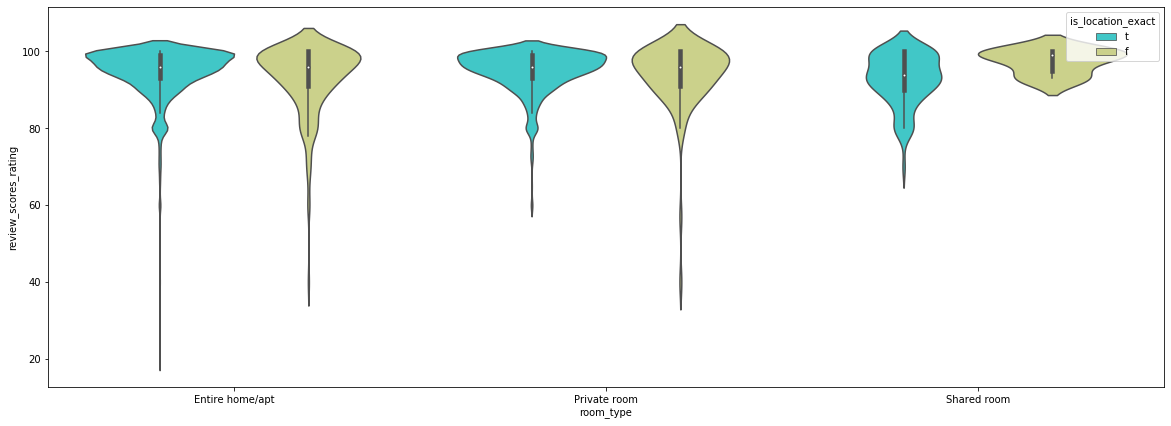

In [18]:
#Analysis of Rating for various Room types based on is loaction exact
sb.violinplot("room_type", "review_scores_rating", hue="is_location_exact", data=listings,palette='rainbow')
plt.show()

The above graph is used to analyse the distribution of values for various room types 

# Pre Processing Methods

[0. 2. 1.]
0.0    3684
1.0     121
2.0      13
Name: price, dtype: int64


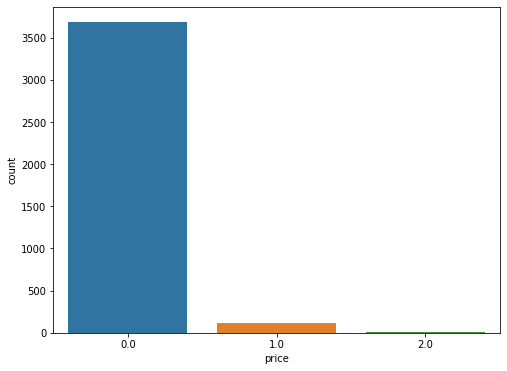

In [19]:
# binning the price column 

bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

# i have used encode = ordianl to ensure the output to be of farm integer, 
#strategy is choosen to keep the bin width same for all

listings['price']=bins.fit_transform(listings[['price']])

print(listings['price'].unique())

# printing the number of values per bin
print(listings["price"].value_counts())

plt.figure(figsize=(8,6))
sb.countplot(listings["price"])
plt.show()



In [20]:
#first converting the last review column to date farm and then subtracting it from todays date to calculate no of days
listings['last_review']= pd.to_datetime(listings['last_review']).dt.date

listings['no_days']= (pd.datetime.now().date()-listings['last_review']).dt.days

print(listings[['last_review', 'no_days']].head())




  last_review  no_days
0  2016-01-02     1551
1  2015-12-29     1555
2  2015-09-03     1672
3  2016-01-02     1551
4  2015-10-24     1621


In [21]:
#binning the availability_30 into 10 equal bins
bins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

listings['availability_30']=bins.fit_transform(listings[['availability_30']])

print(listings['availability_30'].unique())

#binning the availability_60 into 10 equal bins
bins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

listings['availability_60']=bins.fit_transform(listings[['availability_60']])

print(listings['availability_60'].unique())

#binning the availability_90 into 10 equal bins
bins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

listings['availability_90']=bins.fit_transform(listings[['availability_90']])

print(listings['availability_90'].unique())

#binning the availability_365 into 10 equal bins
bins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

listings['availability_365']=bins.fit_transform(listings[['availability_365']])

print(listings['availability_365'].unique())


[4. 0. 9. 6. 7. 2. 8. 3. 5. 1.]
[6. 2. 1. 0. 9. 8. 7. 3. 5. 4.]
[7. 1. 0. 9. 3. 4. 5. 2. 6. 8.]
[9. 7. 6. 3. 8. 2. 4. 1. 5. 0.]


# # 3. Modelling Techniques

Creating a Traininng and Testing set

In [22]:
X= listings[['accommodates', 'bathrooms', 'bedrooms','beds']]

predictor= listings[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, predictor, test_size=0.1, random_state=101)

print ("number of training samples {}".format(X_train.shape))
print ("number of tesing {}".format( y_train.shape))

number of training samples (3436, 4)
number of tesing (3436, 1)


0.9712041884816754
[[369   1   0]
 [  8   2   2]
 [  0   0   0]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       370
         1.0       0.67      0.17      0.27        12
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97       382
   macro avg       0.55      0.39      0.42       382
weighted avg       0.97      0.97      0.97       382

[0.96354167 0.95822454 0.96605744 0.97905759 0.96587927 0.96325459
 0.97900262 0.96850394 0.96587927 0.97112861]


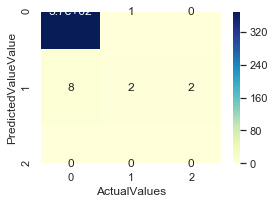

In [23]:
# 1. Applying Decision Tree algorithm to predict the price based on the given training variables

decision= DecisionTreeClassifier()
decission_model= decision.fit(X_train, y_train)
predict= decision.predict(X_test)
print(accuracy_score(y_test, predict))
# creating confusion matrix
confuson_matrix =confusion_matrix(y_test, predict)
#printing the confusion matrix as well as confusion matrix
print(confuson_matrix)
print(classification_report(y_test, predict))

#performing 10 fold cross validation 
cross_val_scores = cross_val_score(decission_model, X, predictor, cv=10)
print(cross_val_scores)

#creation of confusion matrix plot
sb.set(font_scale=1.0)
sb.set(rc={'figure.figsize':(4,3)})
sb.heatmap(confuson_matrix, annot=True, cmap="YlGnBu")
plt.ylabel('PredictedValueValue')
plt.xlabel('ActualValues')
plt.tight_layout()
plt.show()


0.9659685863874345
{'fit_time': array([0.09094119, 0.08495331, 0.09997225, 0.07995129, 0.0789845 ,
       0.09491515, 0.07692552, 0.07697988, 0.07592511, 0.09194493]), 'score_time': array([0.01002502, 0.01495981, 0.01097012, 0.00899529, 0.01099443,
       0.01002693, 0.01199913, 0.01099324, 0.01099443, 0.00999618]), 'test_score': array([0.9609375 , 0.96083551, 0.96083551, 0.97905759, 0.96325459,
       0.95013123, 0.9816273 , 0.97112861, 0.96850394, 0.96850394])}
[[367   3   0]
 [  9   2   1]
 [  0   0   0]]


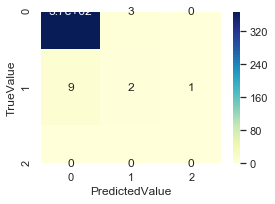

In [24]:
#Random forest classifier

random = RandomForestClassifier(random_state = 0)
# training the model with training data
rand_forest =random.fit(X_train,y_train)
# prediction form test data
randfor_pred = random.predict(X_test)
print(accuracy_score(y_test, randfor_pred))
# 10 fold validation
cv_randfor  = cross_validate(rand_forest, X, predictor, cv=10)
print(cv_randfor)

confusion_matrix_randfor = confusion_matrix(y_test, randfor_pred)
print(confusion_matrix_randfor)
# Plotting of the confusion matrix
sb.set(font_scale=1.0)
sb.heatmap(confusion_matrix_randfor, annot=True, cmap="YlGnBu")
plt.ylabel('TrueValue')
plt.xlabel('PredictedValue')
plt.tight_layout()
plt.show()

0.9712041884816754
[[369   1   0]
 [  8   2   2]
 [  0   0   0]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       370
         1.0       0.67      0.17      0.27        12
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97       382
   macro avg       0.55      0.39      0.42       382
weighted avg       0.97      0.97      0.97       382

[0.9609375  0.95822454 0.96344648 0.97905759 0.96850394 0.96587927
 0.97900262 0.96850394 0.96587927 0.97112861]


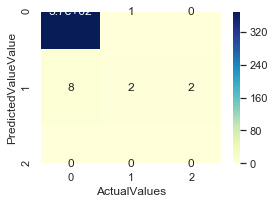

In [28]:
# 1. Applying Knn to predict the price based on the given training variables

Knn= KNeighborsClassifier(n_neighbors = 11)
knn_model= decision.fit(X_train, y_train)
predict= decision.predict(X_test)
print(accuracy_score(y_test, predict))
# creating confusion matrix
confuson_matrix =confusion_matrix(y_test, predict)
print(confuson_matrix)
print(classification_report(y_test, predict))

#performing 10 fold cross validation 
cross_val_scores = cross_val_score(knn_model, X, predictor, cv=10)
print(cross_val_scores)

#creation of confusion matrix plot
sb.set(font_scale=1.0)
sb.set(rc={'figure.figsize':(4,3)})
sb.heatmap(confuson_matrix, annot=True, cmap="YlGnBu")
plt.ylabel('PredictedValueValue')
plt.xlabel('ActualValues')
plt.tight_layout()
plt.show()


In [ ]:
i have choosen the value of k = 11 for the best accurecy , we can even plot the graph to know the optimal graph